<a href="https://colab.research.google.com/github/envirodatascience/final-project-go-squirrels/blob/main/Ethan'sSquirrelNotebook_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Research Question:** Is there a correlation between specific types of behavior in squirrels in Central Park and any kind of weather recorded in October 2018?

**Significance:** Defining that weather is correlated with a certain behavior can help be foundational in further research around the "why?" (Protecting young, territory, claiming new territory?)

In [1]:
#Step One:Import Packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
import plotnine
import seaborn as sns
from plotnine import *
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Import Squirrel Data
url = 'https://raw.githubusercontent.com/envirodatascience/final-project-go-squirrels/refs/heads/main/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250408.csv'
df_squirrels = pd.read_csv(url)
df_squirrels.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [3]:
#Complete squirrel data orienting
df_squirrels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

In [4]:
#Import Weather Data
#Note: see above
df_weather = pd.read_csv('https://raw.githubusercontent.com/envirodatascience/final-project-go-squirrels/refs/heads/main/Central_Park_Weather.csv')
df_weather.head()

,Date,Temperature,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,HDD,CDD,Precipitation,New Snow,Snow Depth
0,NaN,Maximum,Minimum,Average,Departure,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-01,76,63,69.5,6.0,NaN,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,NaN,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,NaN,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,NaN,0,4,0.04,0.0,0


In [5]:
#Complete weather data orienting
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           68 non-null     object 
 1   Temperature    69 non-null     object 
 2   Unnamed: 2     69 non-null     object 
 3   Unnamed: 3     69 non-null     object 
 4   Unnamed: 4     69 non-null     object 
 5   Unnamed: 5     0 non-null      float64
 6   HDD            68 non-null     object 
 7   CDD            68 non-null     object 
 8   Precipitation  68 non-null     object 
 9   New Snow       68 non-null     object 
 10  Snow Depth     68 non-null     object 
dtypes: float64(1), object(10)
memory usage: 6.1+ KB


In [6]:
#Adjust Squirrel Data to a Year-Month-Day Format
df_squirrels['Date'] = df_squirrels['Date'].astype(str)
df_squirrels['Date'] = pd.to_datetime(df_squirrels['Date'], format='%m%d%Y')
df_squirrels.head()


,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [7]:
#Clean Squirrel Data for Relevent Columns
squirrel_df_filtered = df_squirrels.drop(columns=['Unique Squirrel ID', 'Age','Primary Fur Color', 'Highlight Fur Color', 'Combination of Primary and Highlight Color','Color notes',
                                                  'Above Ground Sighter Measurement', 'Running', 'Climbing', 'Eating', 'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans',
                                                  'Tail flags', 'Tail twitches', 'Approaches', 'Indifferent', 'Runs from', 'Other Interactions'])
squirrel_df_filtered.head()

,X,Y,Hectare,Shift,Date,Hectare Squirrel Number,Location,Specific Location,Chasing,Lat/Long
0,-73.956134,40.794082,37F,PM,2018-10-14,3,NaN,NaN,False,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B,AM,2018-10-19,4,NaN,NaN,False,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B,PM,2018-10-14,8,Above Ground,NaN,True,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E,PM,2018-10-17,14,NaN,NaN,False,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E,AM,2018-10-17,5,Above Ground,on tree stump,False,POINT (-73.9702676472613 40.7762126854894)


In [8]:
#Filter out chasing and date rows with NAN in the columns
df_squirrels_filtered = df_squirrels.dropna(subset=['Chasing', 'Date'])
#Filter out chasing and date rows with NAN in the columns
df_squirrels_filtered = df_squirrels.dropna(subset=['Chasing', 'Date'])
df_weather_filtered = df_weather.dropna(subset=['Date'])
#Drop that unnamed column with no data in the weather dataframe
df_weather_filtered = df_weather_filtered.drop(columns=['Unnamed: 5'])
df_weather_filtered.head()

,Date,Temperature,Unnamed: 2,Unnamed: 3,Unnamed: 4,HDD,CDD,Precipitation,New Snow,Snow Depth
1,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0
5,2018-10-05,71,60,65.5,3.6,0,1,0.00,0.0,0


In [9]:
#Rename weather columns to get appropriate names
df_weather_filtered.rename(columns = {'Temperature':'MaxTemp', 'Unnamed: 2':'MinTemp', 'Unnamed: 3':'AvgTemp', 'Unnamed 4':'TempDeparture'}, inplace=True)
df_weather_filtered.head()

,Date,MaxTemp,MinTemp,AvgTemp,Unnamed: 4,HDD,CDD,Precipitation,New Snow,Snow Depth
1,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0
5,2018-10-05,71,60,65.5,3.6,0,1,0.00,0.0,0


In [10]:
#Get the Unnamed: 4 one correct
df_weather_filtered = df_weather_filtered.rename(columns={'Unnamed: 4': 'TempDeparture'})
df_weather_filtered.head()

,Date,MaxTemp,MinTemp,AvgTemp,TempDeparture,HDD,CDD,Precipitation,New Snow,Snow Depth
1,2018-10-01,76,63,69.5,6.0,0,5,0.00,0.0,0
2,2018-10-02,77,65,71.0,7.9,0,6,0.69,0.0,0
3,2018-10-03,74,63,68.5,5.8,0,4,0.00,0.0,0
4,2018-10-04,76,61,68.5,6.2,0,4,0.04,0.0,0
5,2018-10-05,71,60,65.5,3.6,0,1,0.00,0.0,0


In [11]:
df_weather_filtered.dtypes

,0
Date,object
MaxTemp,object
MinTemp,object
AvgTemp,object
TempDeparture,object
HDD,object
CDD,object
Precipitation,object
New Snow,object
Snow Depth,object


In [12]:
#Change weather data to string to merge it with squirrel data on dates and reset index
df_weather_filtered['Date'] = df_weather_filtered['Date'].astype(str)
df_weather_filtered = df_weather_filtered.reset_index(drop=True)
df_weather_filtered.dtypes

,0
Date,object
MaxTemp,object
MinTemp,object
AvgTemp,object
TempDeparture,object
HDD,object
CDD,object
Precipitation,object
New Snow,object
Snow Depth,object


In [13]:
#Change weather data to datetime to merge it with squirrel data on dates and reset index
# Filter out non-date values before converting to datetime
df_weather_filtered = df_weather_filtered[df_weather_filtered['Date'].str.match(r'^\d{4}-\d{2}-\d{2}$')]
df_weather_filtered['Date'] = pd.to_datetime(df_weather_filtered['Date'], format='%Y-%m-%d')
df_weather_filtered = df_weather_filtered.reset_index(drop=True)

combined_df=pd.merge(df_squirrels_filtered, df_weather_filtered, on='Date',how='inner')
combined_df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Lat/Long,MaxTemp,MinTemp,AvgTemp,TempDeparture,HDD,CDD,Precipitation,New Snow,Snow Depth
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,POINT (-73.9561344937861 40.7940823884086),58,47,52.5,-6.0,12,0,0.00,0.0,0
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,POINT (-73.9688574691102 40.7837825208444),60,43,51.5,-5.3,13,0,0.00,0.0,0
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,POINT (-73.97428114848522 40.775533619083),58,47,52.5,-6.0,12,0,0.00,0.0,0
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,POINT (-73.9596413903948 40.7903128889029),61,46,53.5,-4.0,11,0,0.00,0.0,0
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,POINT (-73.9702676472613 40.7762126854894),61,46,53.5,-4.0,11,0,0.00,0.0,0


In [14]:
combined_df.info()
#Note: See above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 40 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   X                                           3023 non-null   float64       
 1   Y                                           3023 non-null   float64       
 2   Unique Squirrel ID                          3023 non-null   object        
 3   Hectare                                     3023 non-null   object        
 4   Shift                                       3023 non-null   object        
 5   Date                                        3023 non-null   datetime64[ns]
 6   Hectare Squirrel Number                     3023 non-null   int64         
 7   Age                                         2902 non-null   object        
 8   Primary Fur Color                           2968 non-null   object        
 9   Highligh

In [15]:
#Check correlation between chasing and weather factors
correlation_matrix = combined_df[['Chasing', 'MaxTemp', 'MinTemp', 'AvgTemp', 'Precipitation']].corr()
correlation_matrix

,Chasing,MaxTemp,MinTemp,AvgTemp,Precipitation
Chasing,1.000000,-0.018206,-0.028959,-0.024048,0.026319
MaxTemp,-0.018206,1.000000,0.945708,0.985620,-0.093018
MinTemp,-0.028959,0.945708,1.000000,0.987029,-0.235217
AvgTemp,-0.024048,0.985620,0.987029,1.000000,-0.168235
Precipitation,0.026319,-0.093018,-0.235217,-0.168235,1.000000


In [16]:
#See if correlations are statistically significant by using scipy.stats
#Convert 'Chasing' and 'MaxTemp' columns to numeric types
combined_df['Chasing'] = pd.to_numeric(combined_df['Chasing'], errors='coerce')
combined_df['MaxTemp'] = pd.to_numeric(combined_df['MaxTemp'], errors='coerce')

#Drop rows with NaN values that resulted from the conversion
combined_df = combined_df.dropna(subset=['Chasing', 'MaxTemp'])

#Calculate the correlation
stats.pearsonr(combined_df['Chasing'], combined_df['MaxTemp'])

PearsonRResult(statistic=np.float64(-0.018205871955243952), pvalue=np.float64(0.31699081048509303))

With the P value being greater than .05, there is no statistical significance between chasing behavior and Max. Temp.

In [17]:
#Convert 'MinTemp' column to numeric type
combined_df['MinTemp'] = pd.to_numeric(combined_df['MinTemp'], errors='coerce')

#Drop rows with empty values
combined_df = combined_df.dropna(subset=['Chasing', 'MinTemp'])

#Calculate the correlation
stats.pearsonr(combined_df['Chasing'], combined_df['MinTemp'])

PearsonRResult(statistic=np.float64(-0.02895896008015137), pvalue=np.float64(0.11140907923028084))

With the P value being greater than .05, there is no statistical significance between chasing behavior and Min. Temp.

In [18]:
#Convert 'AvgTemp' column to numeric type
combined_df['AvgTemp'] = pd.to_numeric(combined_df['AvgTemp'], errors='coerce')

#Drop rows with NaN values
combined_df = combined_df.dropna(subset=['Chasing', 'AvgTemp'])

#Calculate the correlation
stats.pearsonr(combined_df['Chasing'], combined_df['AvgTemp'])

PearsonRResult(statistic=np.float64(-0.024048450463396685), pvalue=np.float64(0.18621085274174412))

With the P value being greater than .05, there is no statistical significance between chasing behavior and Avg. Temp.





In [19]:
#Convert 'Precipitation' column to numeric type
combined_df['Precipitation'] = pd.to_numeric(combined_df['Precipitation'], errors='coerce')

#Drop rows with empty values
combined_df = combined_df.dropna(subset=['Chasing', 'Precipitation'])

#Calculate the correlation
stats.pearsonr(combined_df['Chasing'], combined_df['Precipitation'])

PearsonRResult(statistic=np.float64(0.026319203012533585), pvalue=np.float64(0.14797264971086957))

With the P value being greater than .05, there is no statistical significance between chasing behavior and Precipitation.

While no statistical significance was found between weather variables and chasing behavior, I wonder if a visualization can help a reader see what is most likely to possibly influence chasing behavior in squirrels.

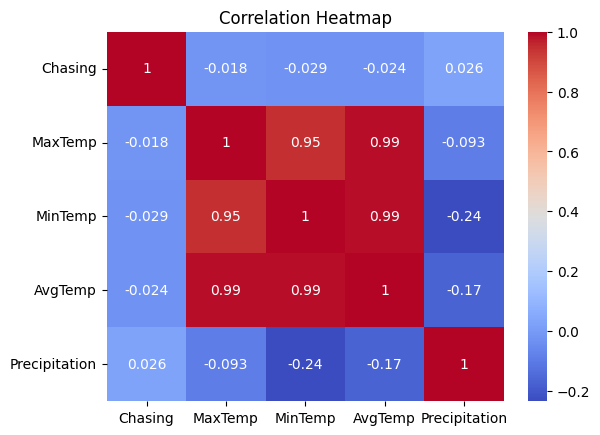

In [20]:
#Create a heatmap using Seaborn (My personal favorite)
#Note: If you are going to use these in final presentation - label and note they aren't really relevent.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

I'll expand the analysis to include Kuks, Quaas, Moans, Tail Flags, Tail Twitches, Indifferent behvaiors. This way, Sophie will focus more on activity level and mine will focus on squirrel mannerisms. This Wired article has an interesting feature on the sounds listed prior: https://www.wired.com/2014/06/squirrel-alarm-calls-are-surprisingly-complex/

I wonder if this analysis could suggest that something that is associated with the weather changes might predispose squirrels to act a certain way.



In [21]:
#I need to define the different variables
behavior_vars = ['Kuks', 'Quaas', 'Moans', 'Tail flags', 'Tail twitches', 'Indifferent']
weather_vars = ['MaxTemp', 'MinTemp', 'AvgTemp', 'Precipitation']

#Create an empty list to collect results
correlation_results = []

#Create the looping code
for behavior in behavior_vars:
    for weather in weather_vars:
        #I'll drop NA values for outcomes from this pair
        valid_data = combined_df[[behavior, weather]].dropna()

        #Correlation code
        if not valid_data.empty:
            from scipy.stats import pearsonr
            corr, p_value = pearsonr(valid_data[behavior], valid_data[weather])
            correlation_results.append({
                'Behavior': behavior,
                'Weather': weather,
                'Correlation': corr,
                'P-Value': p_value
            })


In [22]:
correlation_df = pd.DataFrame(correlation_results)

# Display the results
print(correlation_df)

         Behavior        Weather  Correlation   P-Value
0            Kuks        MaxTemp    -0.022929  0.207562
1            Kuks        MinTemp    -0.025145  0.166917
2            Kuks        AvgTemp    -0.024398  0.179882
3            Kuks  Precipitation     0.005975  0.742631
4           Quaas        MaxTemp    -0.006093  0.737720
5           Quaas        MinTemp    -0.004344  0.811311
6           Quaas        AvgTemp    -0.005268  0.772177
7           Quaas  Precipitation    -0.015549  0.392766
8           Moans        MaxTemp    -0.023576  0.195008
9           Moans        MinTemp    -0.029397  0.106101
10          Moans        AvgTemp    -0.026929  0.138807
11          Moans  Precipitation    -0.013076  0.472354
12     Tail flags        MaxTemp     0.016317  0.369820
13     Tail flags        MinTemp     0.031084  0.087500
14     Tail flags        AvgTemp     0.024220  0.183091
15     Tail flags  Precipitation     0.009224  0.612185
16  Tail twitches        MaxTemp    -0.003425  0

Looking at the output table, it appears that the P value between Tail twitches and precipitation, Indifferent and MaxTemp, Indifferent and MinTemp, and finally Indifferent and AvgTemp are all below .05, leading me to believe that they are statistically significant. They all have postive correlation values, so it also indicates that the values rise together.

In terms of behavioral interpretation, it seems that squirrels in Central Park might just be indifferent towards humans without much change from temperature, beacause they exhibit that behavior in similar rates across ALL of the temperature variables instead of just one or two. Perhaps this is due to the density of Central Park and how often humans and squirrels run into each other.

A correlation between tail twitches and precipatation is interesting, perhaps it could be a signal to other squirrels about approaching rain or a warning not to take shelter in their tree.